<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-train-data" data-toc-modified-id="Loading-train-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading train data</a></span><ul class="toc-item"><li><span><a href="#Merging-train-and-test-data" data-toc-modified-id="Merging-train-and-test-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Merging train and test data</a></span></li><li><span><a href="#Merging-user-data" data-toc-modified-id="Merging-user-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Merging user data</a></span></li><li><span><a href="#Competitions-based-features" data-toc-modified-id="Competitions-based-features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Competitions based features</a></span></li><li><span><a href="#Competitions-data" data-toc-modified-id="Competitions-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Competitions data</a></span></li><li><span><a href="#Time-based-competitions-features" data-toc-modified-id="Time-based-competitions-features-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Time based competitions features</a></span></li><li><span><a href="#Current-active-competitions-feature" data-toc-modified-id="Current-active-competitions-feature-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Current active competitions feature</a></span></li><li><span><a href="#User-Interests-Feature" data-toc-modified-id="User-Interests-Feature-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>User Interests Feature</a></span></li><li><span><a href="#Submissions-based-features" data-toc-modified-id="Submissions-based-features-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Submissions based features</a></span></li><li><span><a href="#Discussion-based-features" data-toc-modified-id="Discussion-based-features-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Discussion based features</a></span></li><li><span><a href="#Comments-based-features" data-toc-modified-id="Comments-based-features-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Comments based features</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Submission" data-toc-modified-id="Submission-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Submission</a></span></li></ul></div>

In [ ]:
!unzip /content/zindi-user-behaviour-birthday-challenge.zip

Archive:  /content/zindi-user-behaviour-birthday-challenge.zip
  inflating: VariableDefinitions.csv  
  inflating: Users.csv               
  inflating: Train.csv               
  inflating: Test.csv                
  inflating: SampleSubmission.csv    
  inflating: Comments.csv            
  inflating: CompetitionPartipation.csv  
  inflating: Discussions.csv         
  inflating: Submissions.csv         
  inflating: Competitions.csv        


In [ ]:
import os
import gc
import sys
import random
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import StratifiedKFold, GroupKFold

%matplotlib inline

In [ ]:
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')
users = pd.read_csv('/content/Users.csv', index_col=None)
submissions = pd.read_csv('/content/Submissions.csv',index_col=None)
comments = pd.read_csv('/content/Comments.csv',index_col=None)
competitions = pd.read_csv('/content/Competitions.csv',index_col=None)
discussions = pd.read_csv('/content/Discussions.csv',index_col=None)
compPart = pd.read_csv('/content/CompetitionPartipation.csv', index_col=None)
vardef = pd.read_csv('/content/VariableDefinitions.csv',index_col=None)
samplesub = pd.read_csv('/content/SampleSubmission.csv',index_col=None)

In [ ]:
users_re = users.rename(columns={'UserID': 'User_ID'})
submissions_re = submissions.rename(columns={'UserID': 'User_ID'})
comments_re = comments.rename(columns={'UserID': 'User_ID'})
competitions_re=competitions.rename(columns={'CompID': 'User_ID'})
discussions_re =discussions.rename(columns={'UserID': 'User_ID'})
compPart_re = compPart.rename(columns={'UserID': 'User_ID'})
vardef_re = vardef.rename(columns={'UserID': 'User_ID'})
samplesub_re = samplesub.rename(columns={'UserID': 'User_ID'})

In [ ]:
samplesub['Target'].value_counts()

,count
Target,


In [ ]:
users_train = pd.merge(train, users_re,  on=['User_ID'])
users_train

,User_ID,month,year,CompPart,Comment,Sub,Disc,Target,FeatureX,Country,FeatureY,Points,UserDate Year,UserDate Month,UserDate Day_of_week
0,ID_XI7BAR4Y,8,3,0,0,0,0,0,0,ID_GU74,0,group 3,2,2,1
1,ID_XI7BAR4Y,8,2,0,0,0,0,0,0,ID_GU74,0,group 3,2,2,1
2,ID_XI7BAR4Y,9,2,0,0,0,0,0,0,ID_GU74,0,group 3,2,2,1
3,ID_XI7BAR4Y,9,3,0,0,0,0,0,0,ID_GU74,0,group 3,2,2,1
4,ID_XI7BAR4Y,10,3,0,0,0,0,0,0,ID_GU74,0,group 3,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259827,ID_MAP5X6D4,12,3,0,0,0,0,0,0,ID_Q02,0,group 1,3,12,7
259828,ID_QHUAHU76,12,3,0,0,0,0,0,0,ID_HWRH,0,group 1,3,12,6
259829,ID_8IKU22O5,12,3,1,0,0,0,1,0,ID_NVM2,0,group 1,3,12,2
259830,ID_NHWCR1IY,12,3,0,0,0,0,0,0,ID_5DCZ,3,group 1,3,12,5


In [ ]:
submissions_train = pd.merge(train, submissions_re,  on=['User_ID'])

In [ ]:
competitions_train = pd.merge(train, competitions_re,  on=['User_ID'])

In [ ]:
discussions_train = pd.merge(train, discussions_re,  on=['User_ID'])

In [ ]:
compPart_train = pd.merge(train, compPart_re,  on=['User_ID'])

# Train data

In [ ]:
train = pd.read_csv('/content/Train.csv',index_col = None)
print(train.shape)
train.head()

(259832, 8)


,User_ID,month,year,CompPart,Comment,Sub,Disc,Target
0,ID_XI7BAR4Y,8,3,0,0,0,0,0
1,ID_XI7BAR4Y,8,2,0,0,0,0,0
2,ID_XI7BAR4Y,9,2,0,0,0,0,0
3,ID_XI7BAR4Y,9,3,0,0,0,0,0
4,ID_XI7BAR4Y,10,3,0,0,0,0,0


# Test data

In [ ]:
test = pd.read_csv('/content/Test.csv',index_col = None)
print(test.shape)
test.head()

(65223, 3)


,User_ID,month,year
0,ID_H1ELY25E,1,4
1,ID_H1ELY25E,2,4
2,ID_H1ELY25E,3,4
3,ID_463Q2BCO,1,4
4,ID_463Q2BCO,2,4


## Merging train and test data

In [ ]:
def determine_timestamp(df):
    df['year_month'] = (
        df['year'].astype(str) +
        df['month'].apply(lambda x: str(x).zfill(2))
    ).astype(int)
    df = df.sort_values(by='year_month').reset_index(drop=True)
    df['timestamp'] = np.arange(1, len(df) + 1)

    return df

all = pd.concat([train, test], ignore_index=True)
timestamp = all[['year', 'month']].drop_duplicates()
timestamp = determine_timestamp(timestamp)
all = all.merge(timestamp, how='left')
all_timestamps = all[['User_ID', 'timestamp', 'year', 'month']].drop_duplicates().reset_index(drop=True)

all = all.sort_values(by='timestamp').reset_index(drop=True)
all['Record'] = 1
all
new_column = all.groupby('User_ID')['Record'].apply(lambda x: x.cumsum())
all['Total_Num_User_Months'] = new_column.reset_index(level=0, drop=True)

## Merging user data

In [ ]:
users.columns = ['User_ID', 'FeatureX', 'Country', 'FeatureY', 'Points', 'year', 'month', 'dayofweek']
users = users.merge(timestamp, how='left')
users = users.rename(columns={"timestamp": "Zindi_Joining_Timestamp"})
users.drop(['dayofweek', 'year', 'month', 'year_month'], axis=1, inplace=True)
users.head()

,User_ID,FeatureX,Country,FeatureY,Points,Zindi_Joining_Timestamp
0,ID_N5LTBAPU,0,ID_DMRM,1,group 3,13
1,ID_CLSFQB0S,0,ID_Q02,3,group 3,2
2,ID_RE6T58Y4,0,ID_Q02,0,group 3,21
3,ID_XJQQRJV3,0,ID_Z8BI,0,group 3,18
4,ID_1JHU6A8S,0,ID_Q02,3,group 3,19


In [ ]:
all = all.merge(users, how='left')
sel_cols = ['FeatureX', 'Country', 'FeatureY', 'Points']
all[sel_cols] = all[sel_cols].astype(str)

## Competitions based features

In [ ]:
compPart.columns = ['CompID', 'User_ID', 'PublicRank', 'Successful_Sub_Count',
                    'year', 'month', 'dayofweek']

test_index = (compPart['year']==3)&(compPart['month'].isin([10,11,12]))
usr_comp = compPart[~test_index].reset_index(drop=True)

usr_comp_timestamp = usr_comp.merge(timestamp, how='left')
usr_comp_timestamp = usr_comp_timestamp[['User_ID', 'month', 'year', 'timestamp']].drop_duplicates()
usr_comp_timestamp.columns = ['User_ID', 'month', 'year', 'comp_timestamp']
all = all.merge(usr_comp_timestamp, how='left')

all = all.sort_values(by='timestamp').reset_index(drop=True)

new_column = all.groupby('User_ID')['comp_timestamp'].apply(lambda x: x.ffill().shift())
all['comp_timestamp'] = new_column.reset_index(level=0, drop=True)
all['Months_Since_Last_Comp'] = all['timestamp'] - all['comp_timestamp']
all['Months_Since_Joining_Zindi'] = all['comp_timestamp'] - all['Zindi_Joining_Timestamp']

In [ ]:
all

,User_ID,month,year,CompPart,Comment,Sub,Disc,Target,year_month,timestamp,Record,Total_Num_User_Months,FeatureX,Country,FeatureY,Points,Zindi_Joining_Timestamp,comp_timestamp,Months_Since_Last_Comp,Months_Since_Joining_Zindi
0,ID_80V1V3ZS,4,1,1.0,0.0,0.0,0.0,1.0,104,1,1,1,0,ID_HWRH,1,group 3,1,NaN,NaN,NaN
1,ID_880OAEQE,4,1,1.0,0.0,0.0,0.0,1.0,104,1,1,1,0,ID_GU74,0,group 1,1,NaN,NaN,NaN
2,ID_1MF2B7CU,4,1,0.0,0.0,0.0,0.0,0.0,104,1,1,1,0,ID_GU74,0,group 3,1,NaN,NaN,NaN
3,ID_LSOTZOCX,4,1,0.0,0.0,0.0,0.0,0.0,104,1,1,1,0,ID_Q02,3,group 1,1,NaN,NaN,NaN
4,ID_OWZ10Y8N,4,1,0.0,0.0,0.0,0.0,0.0,104,1,1,1,0,ID_GU74,3,group 1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325050,ID_QIV2CYCO,3,4,NaN,NaN,NaN,NaN,NaN,403,36,1,6,0,ID_ABPY,1,group 1,31,NaN,NaN,NaN
325051,ID_OZXN4L1J,3,4,NaN,NaN,NaN,NaN,NaN,403,36,1,10,0,ID_NVM2,0,group 3,27,27.0,9.0,0.0
325052,ID_BAX4QE6S,3,4,NaN,NaN,NaN,NaN,NaN,403,36,1,19,0,ID_HIXK,0,group 1,18,18.0,18.0,0.0
325053,ID_LI6NLHL1,3,4,NaN,NaN,NaN,NaN,NaN,403,36,1,10,0,ID_Q02,3,group 1,27,NaN,NaN,NaN


## Submissions based features

In [ ]:
submissions.columns = ['User_ID', 'FeatureG', 'CompID', 'year', 'month', 'dayofweek']


test_index = (submissions['year']==3)&(submissions['month'].isin([10,11,12]))
usr_sub = submissions[~test_index].reset_index(drop=True)

usr_sub_timestamp = usr_sub.merge(timestamp, how='left')
usr_sub_timestamp = usr_sub_timestamp[['User_ID', 'month', 'year', 'timestamp']].drop_duplicates()
usr_sub_timestamp.columns = ['User_ID', 'month', 'year', 'sub_timestamp']
overall = all.merge(usr_sub_timestamp, how='left')

overall = overall.sort_values(by='timestamp').reset_index(drop=True)
overall['sub_timestamp'] = overall.groupby('User_ID')['sub_timestamp'].apply(lambda x: x.ffill().shift()).reset_index(drop=True)
overall['Months_Since_Last_Sub'] = overall['timestamp'] - overall['sub_timestamp']
overall['Months_Since_Sub_Joining_Zindi'] = overall['sub_timestamp'] - overall['Zindi_Joining_Timestamp']

In [ ]:
sub_hist = usr_sub.groupby(['User_ID', 'year', 'month']).agg({'CompID': ['nunique', 'count']})
sub_hist.columns = ["_".join(col) for col in sub_hist.columns]
sub_hist['Sub_Per_Comp'] = sub_hist['CompID_nunique']/sub_hist['CompID_count']
sub_hist.drop(['CompID_nunique', 'CompID_count'], axis=1, inplace=True)
sub_hist = sub_hist.reset_index()
sub_hist.columns = [*sub_hist.columns[:-1]] + ['Num_Sub_Prev_Month']

overall = overall.merge(sub_hist, how='left')
overall = overall.sort_values(by=['User_ID', 'timestamp']).reset_index(drop=True)
overall['Num_Sub_Prev_Month'] = overall['Num_Sub_Prev_Month'].fillna(0)
overall['Num_Sub_Per_Month'] = overall.groupby('User_ID')['Num_Sub_Prev_Month'].cumsum()
overall['Num_Sub_Per_Month_trend'] = overall['Num_Sub_Per_Month']/overall['Total_Num_User_Months']
overall['Num_Sub_Per_Month_trend'] = overall.groupby('User_ID')['Num_Sub_Per_Month_trend'].apply(lambda x: x.shift()).reset_index(drop=True)
overall['Num_Sub_Per_Month'] = overall['Num_Sub_Per_Month']/(overall['timestamp'].max() - overall['Zindi_Joining_Timestamp'])
overall['Num_Sub_Per_Month'] = overall.groupby('User_ID')['Num_Sub_Per_Month'].apply(lambda x: x.shift()).reset_index(drop=True)

overall['Num_Sub_Prev_Month'] = overall.groupby('User_ID')['Num_Sub_Prev_Month'].apply(lambda x: x.shift()).reset_index(drop=True)
overall['Num_Sub_Prev_Month_momentum'] = overall['Num_Sub_Prev_Month'] - overall.groupby('User_ID')['Num_Sub_Prev_Month'].apply(lambda x: x.shift(1)).reset_index(drop=True)
overall['Num_Sub_Prev_Month_momentum2'] = overall['Num_Sub_Prev_Month'] - overall.groupby('User_ID')['Num_Sub_Prev_Month'].apply(lambda x: x.shift(2)).reset_index(drop=True)

In [ ]:
tmp = usr_sub.groupby(['User_ID', 'year', 'month', 'FeatureG'])['CompID'].nunique().unstack('FeatureG')#.apply(lambda x: x/x.sum(), axis=1)
col_names = [tmp.columns.name + "_" + str(col) for col in tmp.columns]
tmp.columns = col_names
tmp = tmp.fillna(0)
tmp = tmp.reset_index()

all_timestamps = overall[['User_ID', 'timestamp', 'year', 'month']].drop_duplicates().reset_index(drop=True)
tmp = all_timestamps.merge(tmp, how='left')
tmp = tmp.sort_values(by='timestamp').reset_index(drop=True)
for col in col_names:
    tmp[col] = tmp.groupby('User_ID')[col].apply(lambda x: x.ffill().shift()).reset_index(drop=True)

overall = overall.merge(tmp, how='left')

## Discussion based features

In [ ]:
discussions.columns = ['FeatureF', 'year', 'month', 'dayofweek', 'DiscID', 'User_ID']


test_index = (discussions['year']==3)&(discussions['month'].isin([10,11,12]))
usr_dis = discussions[~test_index].reset_index(drop=True)

usr_dis_timestamp = usr_dis.merge(timestamp, how='left')
usr_dis_timestamp = usr_dis_timestamp[['User_ID', 'month', 'year', 'timestamp']].drop_duplicates()
usr_dis_timestamp.columns = ['User_ID', 'month', 'year', 'discussion_timestamp']
overall = overall.merge(usr_dis_timestamp, how='left')

overall = overall.sort_values(by='timestamp').reset_index(drop=True)
overall['discussion_timestamp'] = overall.groupby('User_ID')['discussion_timestamp'].apply(lambda x: x.ffill().shift()).reset_index(drop=True)
overall['Months_Since_Last_Dis'] = overall['timestamp'] - overall['discussion_timestamp']
overall['Months_Since_Dis_Joining_Zindi'] = overall['discussion_timestamp'] - overall['Zindi_Joining_Timestamp']

In [ ]:
dis_hist = usr_dis.groupby(['User_ID', 'year', 'month'])['DiscID'].nunique()
dis_hist = dis_hist.reset_index()
dis_hist.columns = [*dis_hist.columns[:-1]] + ['Num_Dis_Prev_Month']

overall = overall.merge(dis_hist, how='left')
overall = overall.sort_values(by=['User_ID', 'timestamp']).reset_index(drop=True)
overall['Num_Dis_Prev_Month'] = overall['Num_Dis_Prev_Month'].fillna(0)
overall['Num_Dis_Per_Month'] = overall.groupby('User_ID')['Num_Dis_Prev_Month'].cumsum()
overall['Num_Dis_Per_Month_trend'] = overall['Num_Dis_Per_Month']/overall['Total_Num_User_Months']
overall['Num_Dis_Per_Month_trend'] = overall.groupby('User_ID')['Num_Dis_Per_Month_trend'].apply(lambda x: x.shift()).reset_index(drop=True)
overall['Num_Dis_Per_Month'] = overall['Num_Dis_Per_Month']/(overall['timestamp'].max() - overall['Zindi_Joining_Timestamp'])
overall['Num_Dis_Per_Month'] = overall.groupby('User_ID')['Num_Dis_Per_Month'].apply(lambda x: x.shift()).reset_index(drop=True)

overall['Num_Dis_Prev_Month'] = overall.groupby('User_ID')['Num_Dis_Prev_Month'].apply(lambda x: x.shift()).reset_index(drop=True)
overall['Num_Dis_Prev_Month_momentum'] = overall['Num_Dis_Prev_Month'] - overall.groupby('User_ID')['Num_Dis_Prev_Month'].apply(lambda x: x.shift(1)).reset_index(drop=True)
overall['Num_Dis_Prev_Month_momentum2'] = overall['Num_Dis_Prev_Month'] - overall.groupby('User_ID')['Num_Dis_Prev_Month'].apply(lambda x: x.shift(2)).reset_index(drop=True)

## Comments based features

In [ ]:
comments.columns = ['User_ID', 'year', 'month', 'dayofweek']
comments['CommID'] = np.arange(len(comments))

test_index = (comments['year']==3)&(comments['month'].isin([10,11,12]))
usr_comments = comments[~test_index].reset_index(drop=True)

usr_comm_timestamp = usr_comments.merge(timestamp, how='left')
usr_comm_timestamp = usr_comm_timestamp[['User_ID', 'month', 'year', 'timestamp']].drop_duplicates()
usr_comm_timestamp.columns = ['User_ID', 'month', 'year', 'comment_timestamp']
overall = overall.merge(usr_comm_timestamp, how='left')

overall = overall.sort_values(by='timestamp').reset_index(drop=True)
overall['comment_timestamp'] = overall.groupby('User_ID')['comment_timestamp'].apply(lambda x: x.ffill().shift()).reset_index(drop=True)
overall['Months_Since_Last_Comment'] = overall['timestamp'] - overall['comment_timestamp']
overall['Months_Since_Comment_Joining_Zindi'] = overall['comment_timestamp'] - overall['Zindi_Joining_Timestamp']

In [ ]:
comm_hist = usr_comments.groupby(['User_ID', 'year', 'month'])['CommID'].nunique()
comm_hist = comm_hist.reset_index()
comm_hist.columns = [*comm_hist.columns[:-1]] + ['Num_Comm_Prev_Month']

overall = overall.merge(comm_hist, how='left')
overall = overall.sort_values(by=['User_ID', 'timestamp']).reset_index(drop=True)
overall['Num_Comm_Prev_Month'] = overall['Num_Comm_Prev_Month'].fillna(0)
overall['Num_Comm_Per_Month'] = overall.groupby('User_ID')['Num_Comm_Prev_Month'].cumsum()
overall['Num_Comm_Per_Month_trend'] = overall['Num_Comm_Per_Month']/overall['Total_Num_User_Months']
overall['Num_Comm_Per_Month_trend'] = overall.groupby('User_ID')['Num_Comm_Per_Month_trend'].apply(lambda x: x.shift()).reset_index(drop=True)
overall['Num_Comm_Per_Month'] = overall['Num_Comm_Per_Month']/(overall['timestamp'].max() - overall['Zindi_Joining_Timestamp'])
overall['Num_Comm_Per_Month'] = overall.groupby('User_ID')['Num_Comm_Per_Month'].apply(lambda x: x.shift()).reset_index(drop=True)

overall['Num_Comm_Prev_Month'] = overall.groupby('User_ID')['Num_Comm_Prev_Month'].apply(lambda x: x.shift()).reset_index(drop=True)
overall['Num_Comm_Prev_Month_momentum'] = overall['Num_Comm_Prev_Month'] - overall.groupby('User_ID')['Num_Comm_Prev_Month'].apply(lambda x: x.shift(1)).reset_index(drop=True)
overall['Num_Comm_Prev_Month_momentum2'] = overall['Num_Comm_Prev_Month'] - overall.groupby('User_ID')['Num_Comm_Prev_Month'].apply(lambda x: x.shift(2)).reset_index(drop=True)

In [ ]:
tmp = overall.groupby('timestamp').agg({
    "User_ID": ["nunique"],
    "Total_Num_User_Months": ["mean", "max", "std"],
})
tmp.columns = ["_".join(col) for col in tmp.columns]
tmp = tmp.reset_index()

overall = overall.merge(tmp, how='left')

In [ ]:
sel_cols = ['Months_Since_Last_Comp', 'Months_Since_Last_Dis', 'Months_Since_Last_Sub', 'Months_Since_Last_Comment']
overall['Months_Since_Last_Activity_Mean'] = overall[sel_cols].std(axis=1)

In [ ]:
time_cols = [
    'Zindi_Joining_Timestamp',
    'comment_timestamp',
    'comp_timestamp',
    'discussion_timestamp',
    'sub_timestamp',
    'Months_Since_Last_Comp',
    'Months_Since_Last_Sub',
    'Months_Since_Last_Dis',
    'Months_Since_Last_Comment',
]

for col in time_cols:
    overall[col] = overall[col]/overall['timestamp']

In [ ]:
tmp_time = overall[overall['Zindi_Joining_Timestamp']==1]
tmp_time = tmp_time.groupby('timestamp')['User_ID'].nunique().to_frame("unique_user_count")
tmp_time = tmp_time.reset_index()

overall = overall.merge(tmp_time, how='left')

In [ ]:
overall

,User_ID,month,year,CompPart,Comment,Sub,Disc,Target,year_month,timestamp,...,Num_Comm_Per_Month,Num_Comm_Per_Month_trend,Num_Comm_Prev_Month_momentum,Num_Comm_Prev_Month_momentum2,User_ID_nunique,Total_Num_User_Months_mean,Total_Num_User_Months_max,Total_Num_User_Months_std,Months_Since_Last_Activity_Mean,unique_user_count
0,ID_000VV0KM,12,2,1.0,0.0,1.0,0.0,1.0,212,21,...,NaN,NaN,NaN,NaN,9470,7.598310,21,5.522981,NaN,978
1,ID_000VV0KM,1,3,0.0,0.0,0.0,0.0,0.0,301,22,...,0.0,0.0,NaN,NaN,10455,7.882449,22,5.705838,5.656854,985
2,ID_000VV0KM,2,3,0.0,0.0,0.0,0.0,0.0,302,23,...,0.0,0.0,0.0,NaN,11623,8.090338,23,5.907749,NaN,1168
3,ID_000VV0KM,3,3,0.0,0.0,0.0,0.0,0.0,303,24,...,0.0,0.0,0.0,0.0,12745,8.378109,24,6.089666,NaN,1122
4,ID_000VV0KM,4,3,0.0,0.0,0.0,0.0,0.0,304,25,...,0.0,0.0,0.0,0.0,13837,8.716918,25,6.265773,NaN,1092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325050,ID_ZZXDLYXB,11,3,0.0,0.0,0.0,0.0,0.0,311,32,...,0.0,0.0,0.0,0.0,19501,12.287267,32,7.604691,NaN,804
325051,ID_ZZXDLYXB,12,3,0.0,0.0,0.0,0.0,0.0,312,33,...,0.0,0.0,0.0,0.0,20218,12.851518,33,7.806719,NaN,717
325052,ID_ZZXDLYXB,1,4,NaN,NaN,NaN,NaN,NaN,401,34,...,0.0,0.0,0.0,0.0,20940,13.408405,34,8.021347,1.154701,722
325053,ID_ZZXDLYXB,2,4,NaN,NaN,NaN,NaN,NaN,402,35,...,0.0,0.0,0.0,0.0,21881,13.831772,35,8.305082,4.242641,941


<Axes: xlabel='Target', ylabel='count'>

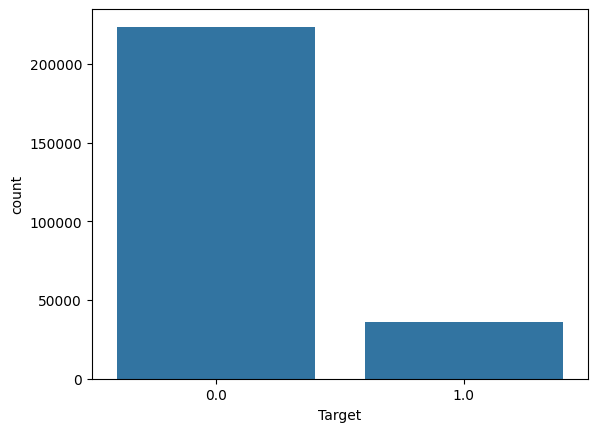

In [ ]:
sns.countplot(data = overall, x = 'Target')

In [ ]:
overall['Target'].value_counts()

,count
Target,
0.0,223526
1.0,36306


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = overall.select_dtypes(include=numerics)
num_cols = newdf.columns
newdf

,month,year,CompPart,Comment,Sub,Disc,Target,year_month,timestamp,Record,...,Num_Comm_Per_Month,Num_Comm_Per_Month_trend,Num_Comm_Prev_Month_momentum,Num_Comm_Prev_Month_momentum2,User_ID_nunique,Total_Num_User_Months_mean,Total_Num_User_Months_max,Total_Num_User_Months_std,Months_Since_Last_Activity_Mean,unique_user_count
0,12,2,1.0,0.0,1.0,0.0,1.0,212,21,1,...,NaN,NaN,NaN,NaN,9470,7.598310,21,5.522981,NaN,978
1,1,3,0.0,0.0,0.0,0.0,0.0,301,22,1,...,0.0,0.0,NaN,NaN,10455,7.882449,22,5.705838,5.656854,985
2,2,3,0.0,0.0,0.0,0.0,0.0,302,23,1,...,0.0,0.0,0.0,NaN,11623,8.090338,23,5.907749,NaN,1168
3,3,3,0.0,0.0,0.0,0.0,0.0,303,24,1,...,0.0,0.0,0.0,0.0,12745,8.378109,24,6.089666,NaN,1122
4,4,3,0.0,0.0,0.0,0.0,0.0,304,25,1,...,0.0,0.0,0.0,0.0,13837,8.716918,25,6.265773,NaN,1092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325050,11,3,0.0,0.0,0.0,0.0,0.0,311,32,1,...,0.0,0.0,0.0,0.0,19501,12.287267,32,7.604691,NaN,804
325051,12,3,0.0,0.0,0.0,0.0,0.0,312,33,1,...,0.0,0.0,0.0,0.0,20218,12.851518,33,7.806719,NaN,717
325052,1,4,NaN,NaN,NaN,NaN,NaN,401,34,1,...,0.0,0.0,0.0,0.0,20940,13.408405,34,8.021347,1.154701,722
325053,2,4,NaN,NaN,NaN,NaN,NaN,402,35,1,...,0.0,0.0,0.0,0.0,21881,13.831772,35,8.305082,4.242641,941


In [ ]:
overall[num_cols].describe()

,month,year,CompPart,Comment,Sub,Disc,Target,year_month,timestamp,Record,...,Num_Comm_Per_Month,Num_Comm_Per_Month_trend,Num_Comm_Prev_Month_momentum,Num_Comm_Prev_Month_momentum2,User_ID_nunique,Total_Num_User_Months_mean,Total_Num_User_Months_max,Total_Num_User_Months_std,Months_Since_Last_Activity_Mean,unique_user_count
count,325055.000000,325055.000000,259832.000000,259832.000000,259832.000000,259832.000000,259832.000000,325055.000000,325055.000000,325055.0,...,302653.000000,302653.000000,280772.000000,259832.000000,325055.000000,325055.000000,325055.000000,325055.000000,100069.000000,325055.000000
mean,6.330661,2.953596,0.120867,0.014921,0.064676,0.014532,0.139729,301.690216,26.773808,1.0,...,0.023154,0.048440,-0.004381,-0.009356,14991.889911,10.226192,26.773808,6.547988,5.310964,800.448761
std,3.713567,0.704939,0.325973,0.121238,0.245954,0.119672,0.346706,68.678100,7.305465,0.0,...,0.196853,0.379122,0.651688,0.790452,5984.206862,2.856518,7.305465,1.528697,4.064772,272.827729
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104.000000,1.000000,1.0,...,0.000000,0.000000,-89.000000,-89.000000,124.000000,1.000000,1.000000,0.000000,0.000000,101.000000
25%,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,301.000000,22.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,10455.000000,7.882449,22.000000,5.705838,2.121320,599.000000
50%,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,307.000000,28.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,16335.000000,10.224977,28.000000,6.760207,4.242641,804.000000
75%,10.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,312.000000,33.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,20218.000000,12.851518,33.000000,7.806719,7.778175,985.000000
max,12.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,403.000000,36.000000,1.0,...,10.894737,28.000000,68.000000,80.000000,22402.000000,14.510088,36.000000,8.468551,20.506097,1295.000000


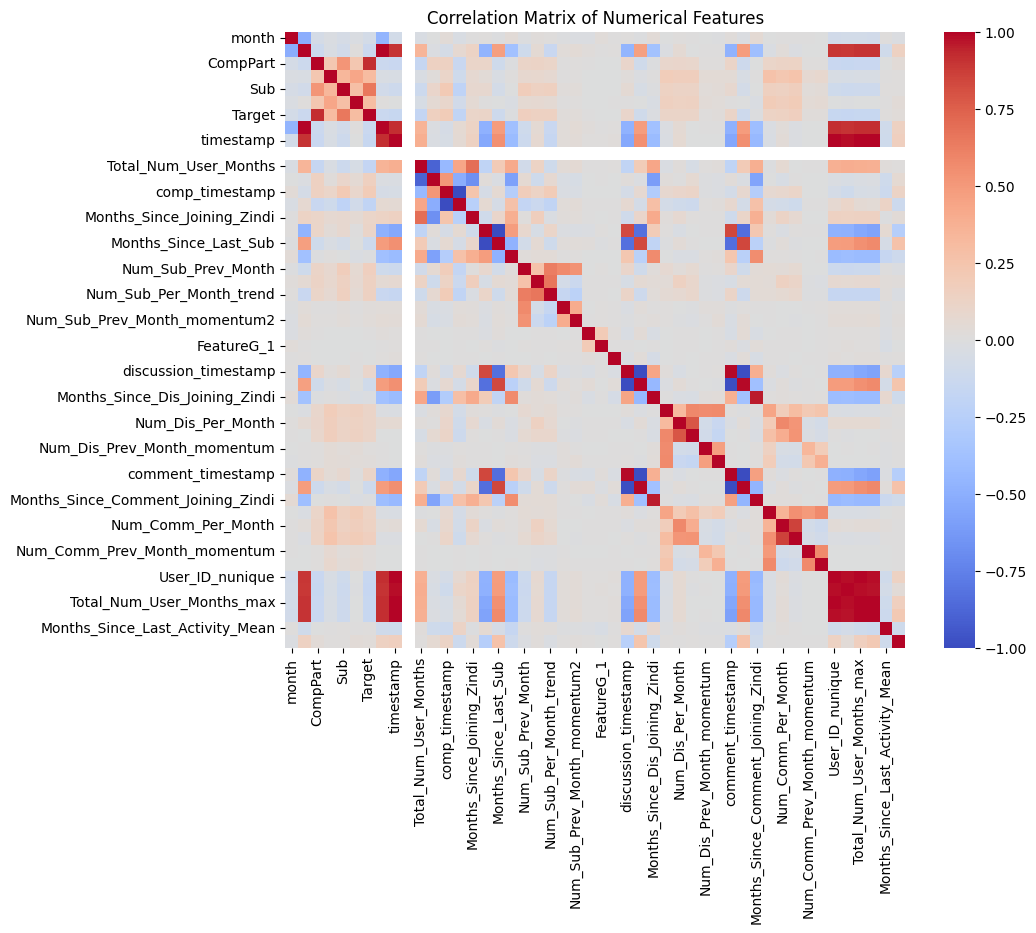

In [ ]:
num_cols = overall.select_dtypes(include=['float64', 'int64']).columns
descriptive_stats = overall[num_cols].describe()
corr_matrix = overall[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
target_corr = corr_matrix['Target']

target_corr = target_corr.drop(labels=['Target'])

top_10_features = target_corr.abs().sort_values(ascending=False).head(10)

print("Top 10 features with the strongest correlation with Target:")
print(top_10_features)

Top 10 features with the strongest correlation with Target:
CompPart                      0.920027
Sub                           0.652479
Comment                       0.305380
Disc                          0.301317
comp_timestamp                0.193230
Months_Since_Last_Comp        0.193230
Total_Num_User_Months         0.177222
Total_Num_User_Months_mean    0.163860
Num_Sub_Prev_Month            0.163212
Num_Comm_Per_Month_trend      0.156296
Name: Target, dtype: float64


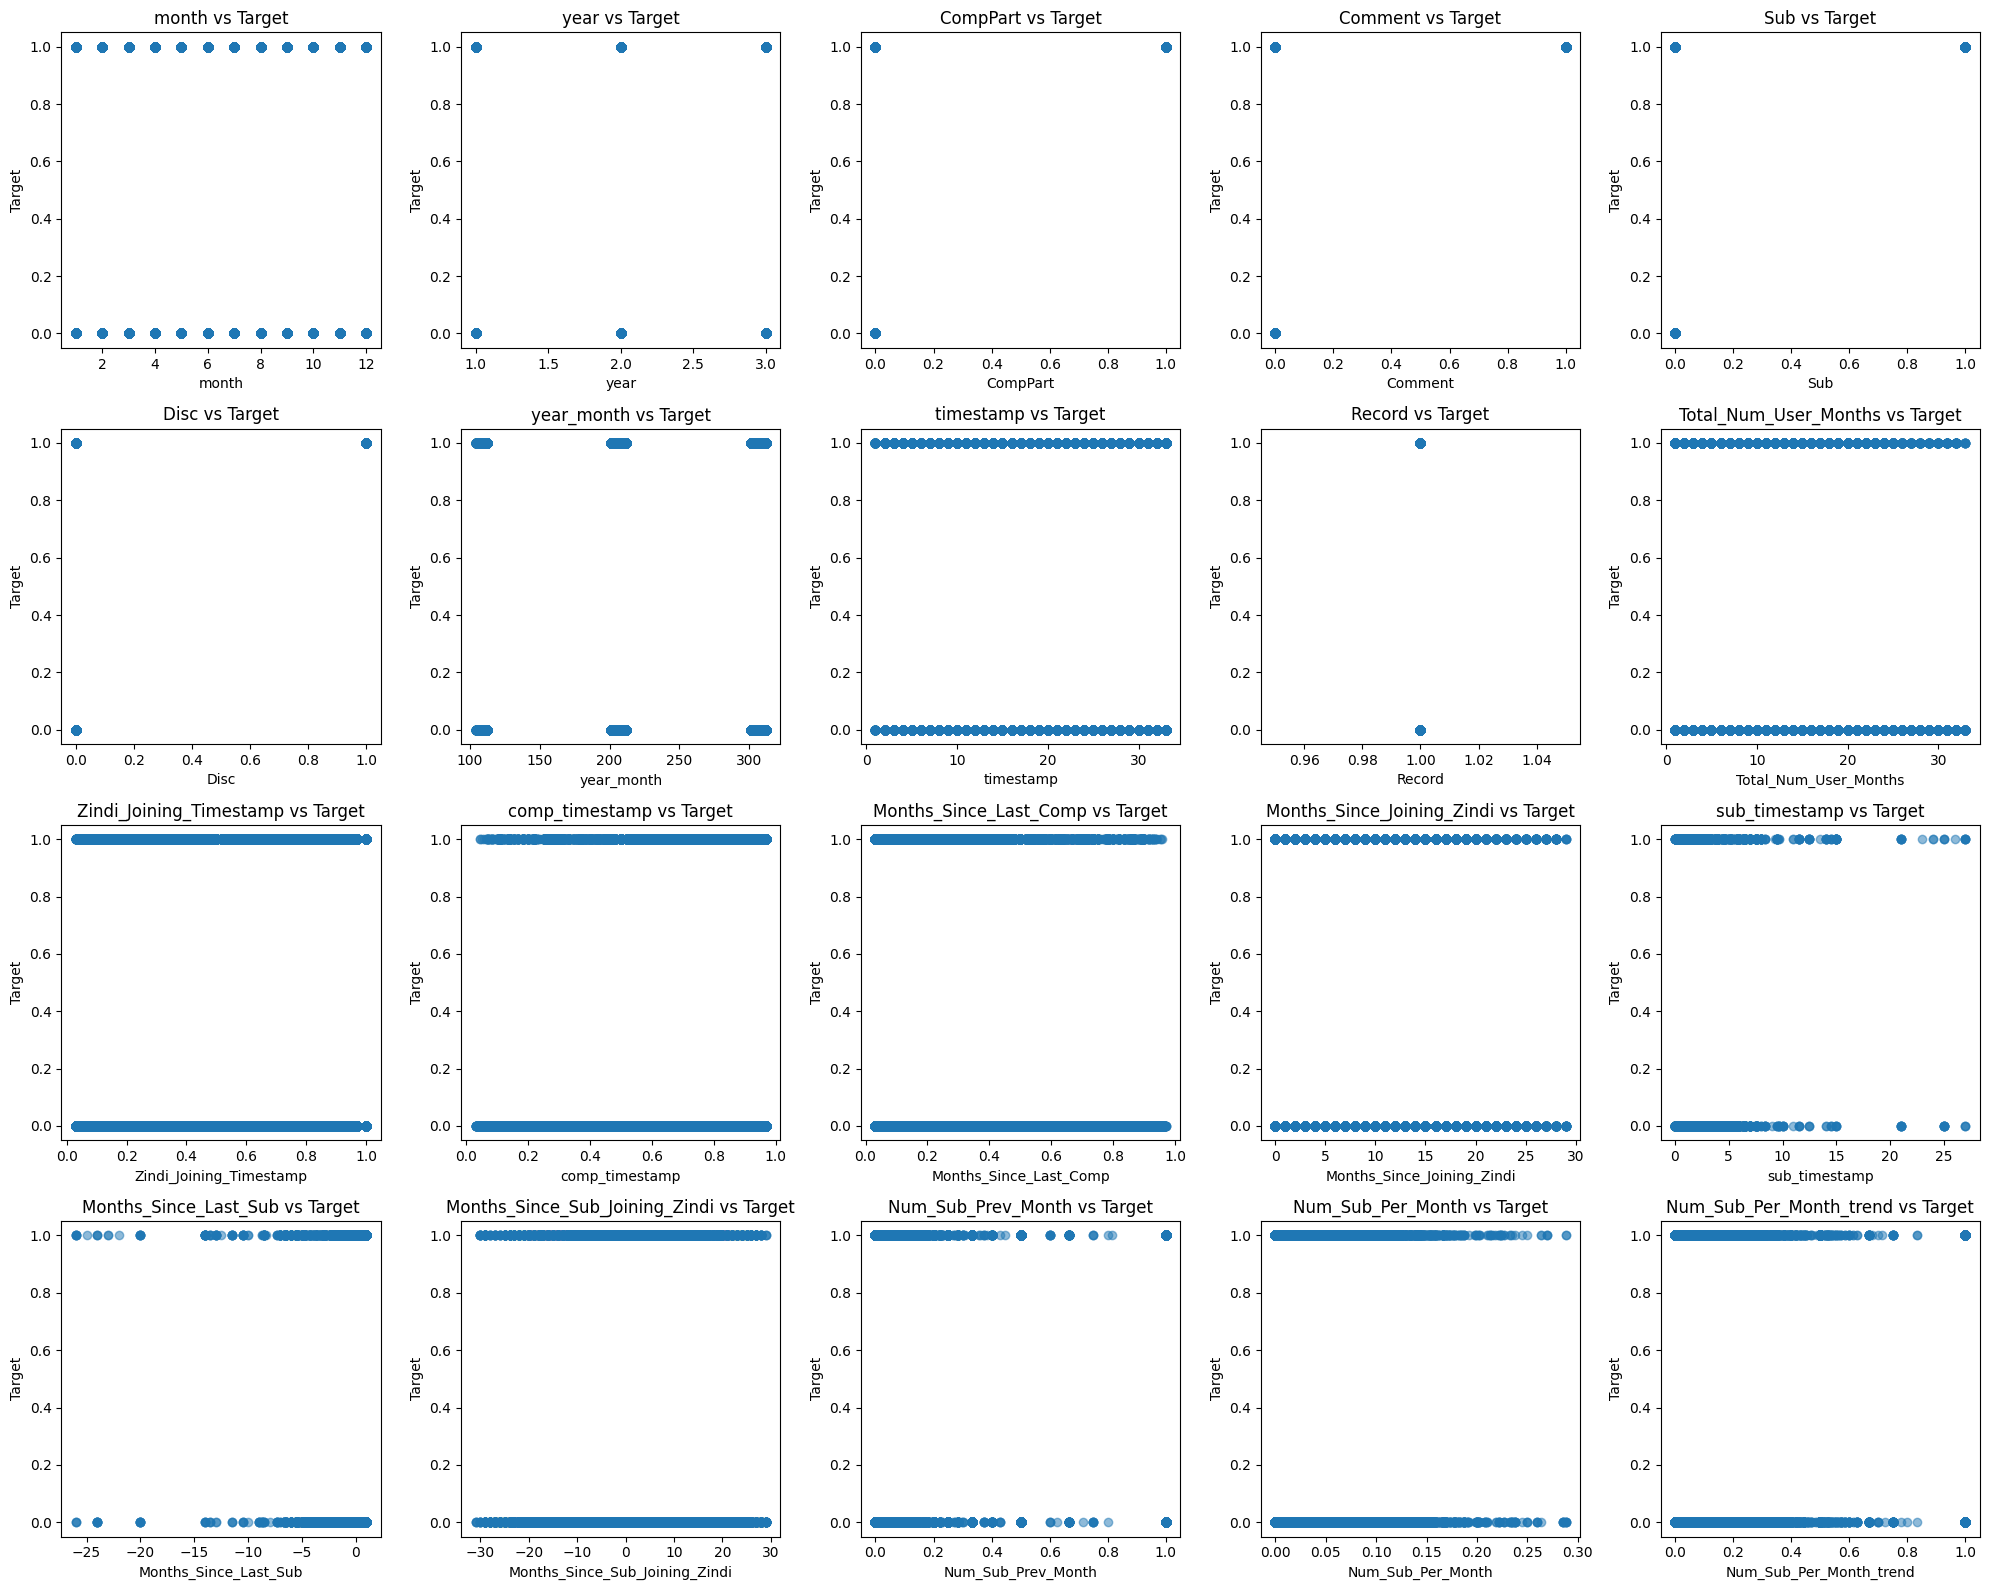

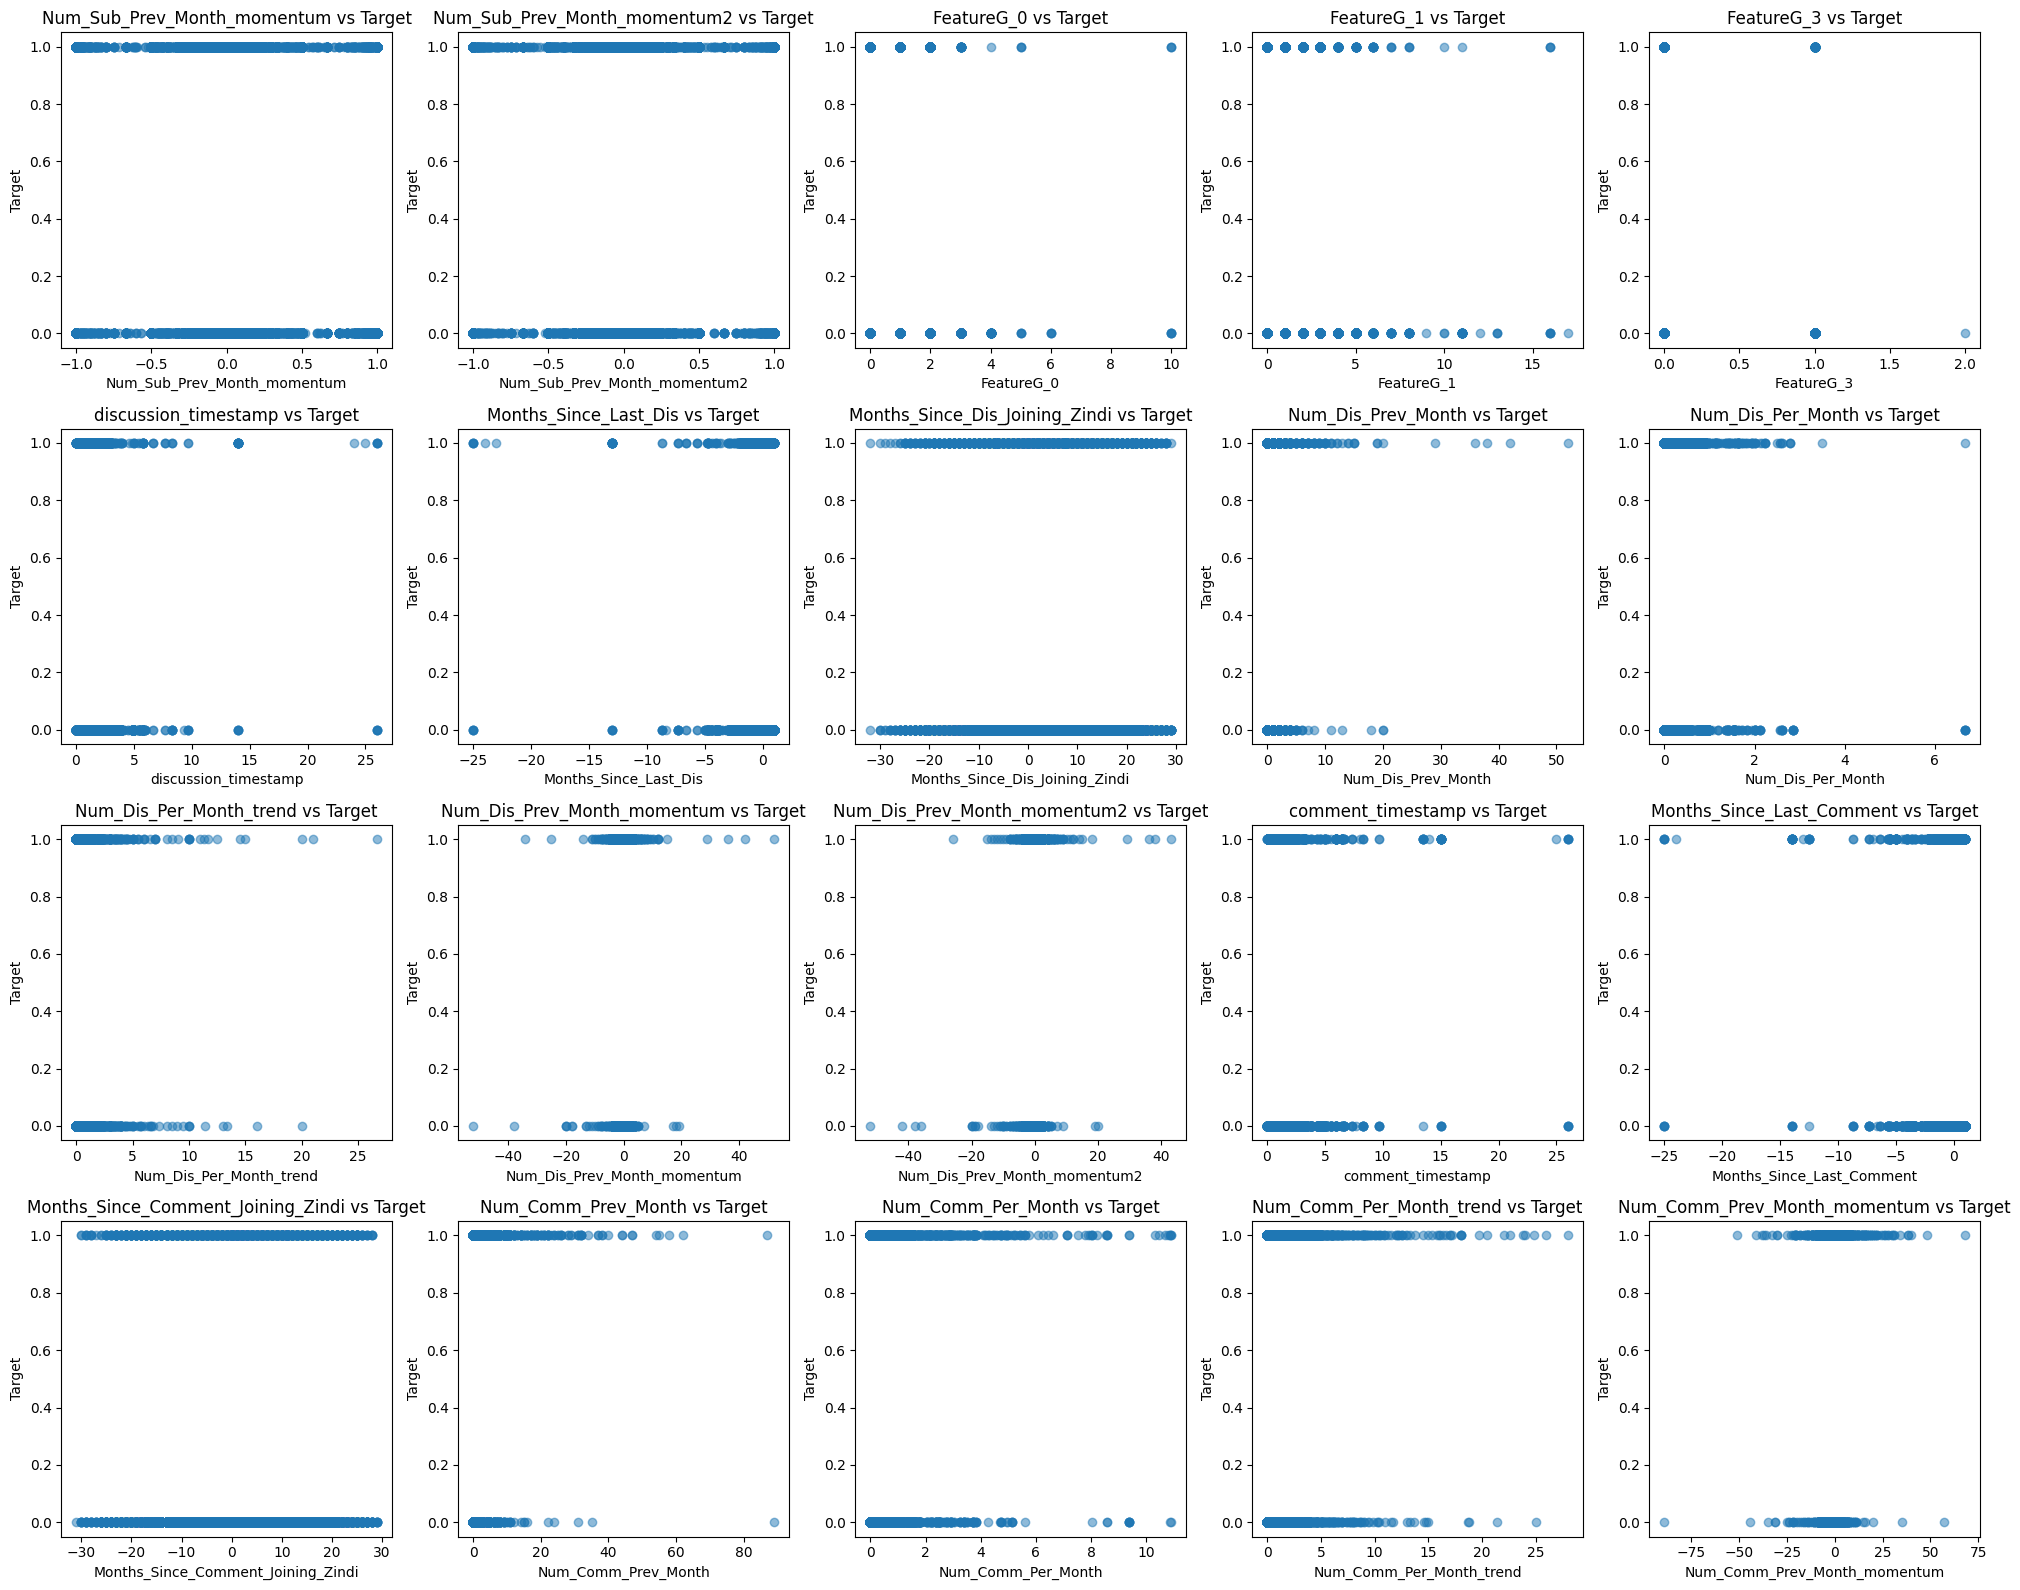

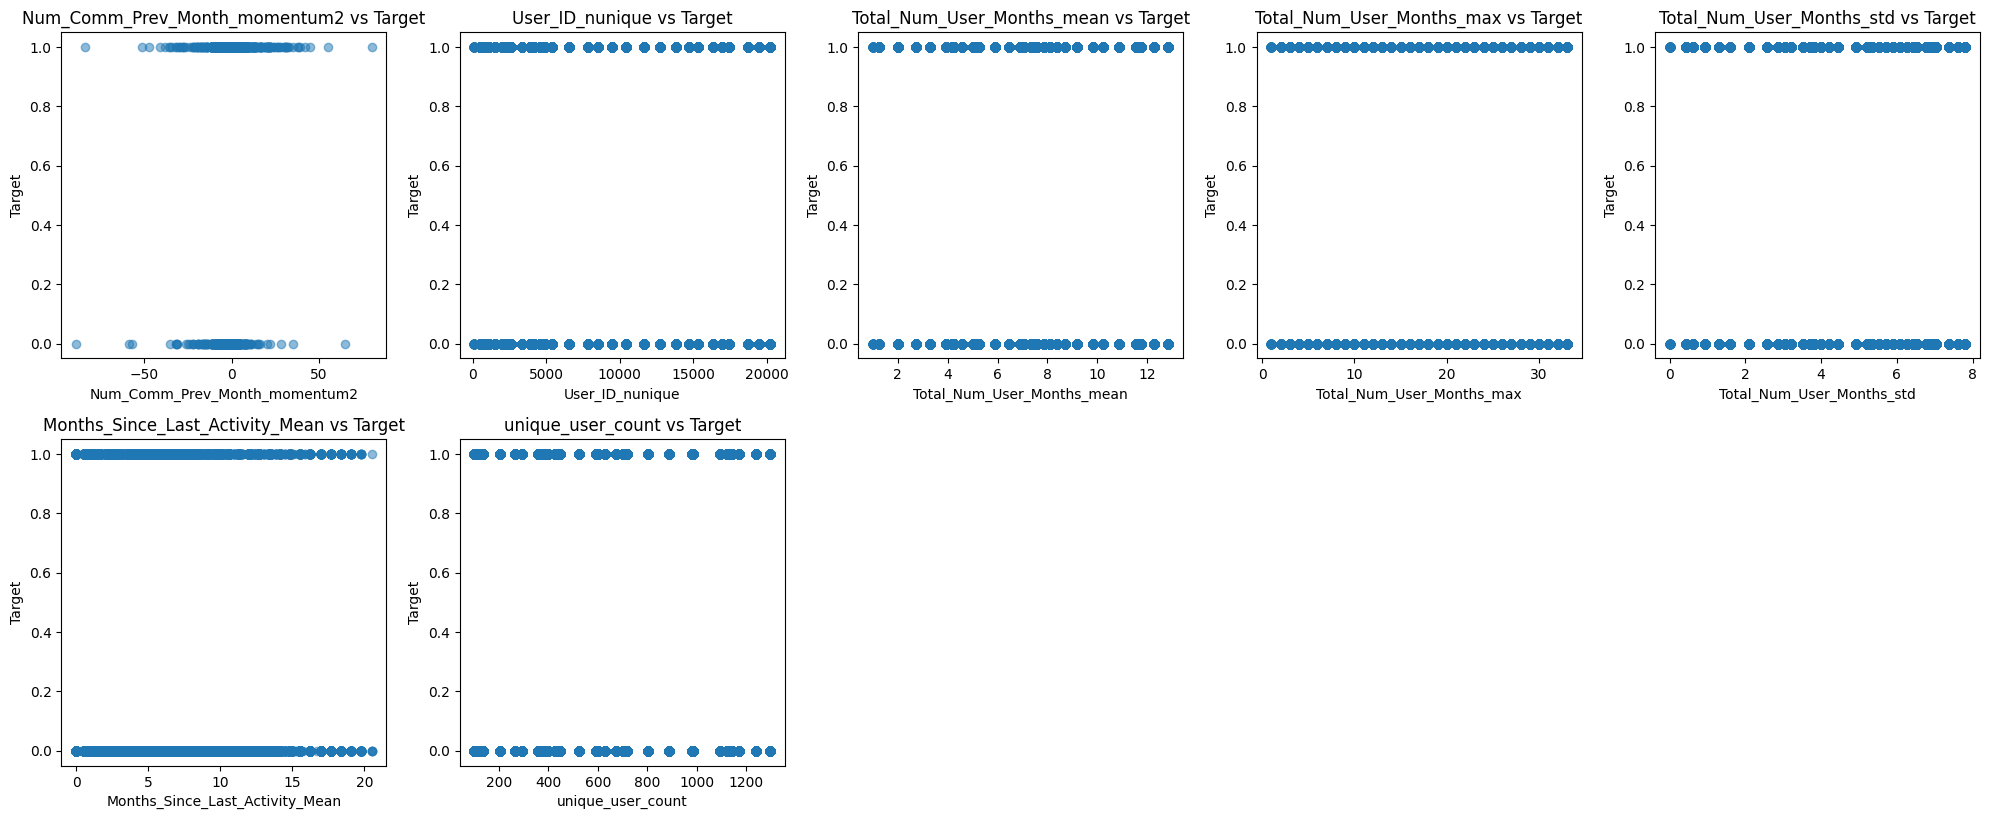

In [ ]:
num_cols = [col for col in overall.columns if overall[col].dtype in ['float64', 'int64'] and col != 'Target']

# Define the number of plots per row and the number of rows per figure
cols_per_row = 5
rows_per_figure = 4
plots_per_figure = cols_per_row * rows_per_figure  # This equals 20

# Calculate total number of figures needed
total_figures = (len(num_cols) + plots_per_figure - 1) // plots_per_figure

for i in range(total_figures):
    plt.figure(figsize=(20, 16))
    start_index = i * plots_per_figure
    end_index = min(start_index + plots_per_figure, len(num_cols))
    for j, col in enumerate(num_cols[start_index:end_index], start=1):
        plt.subplot(rows_per_figure, cols_per_row, j)
        plt.scatter(overall[col], overall['Target'], alpha=0.5)
        plt.title(f'{col} vs Target')
        plt.xlabel(col)
        plt.ylabel('Target')
    plt.tight_layout()  # Adjust layout to prevent label overlap
    plt.show()

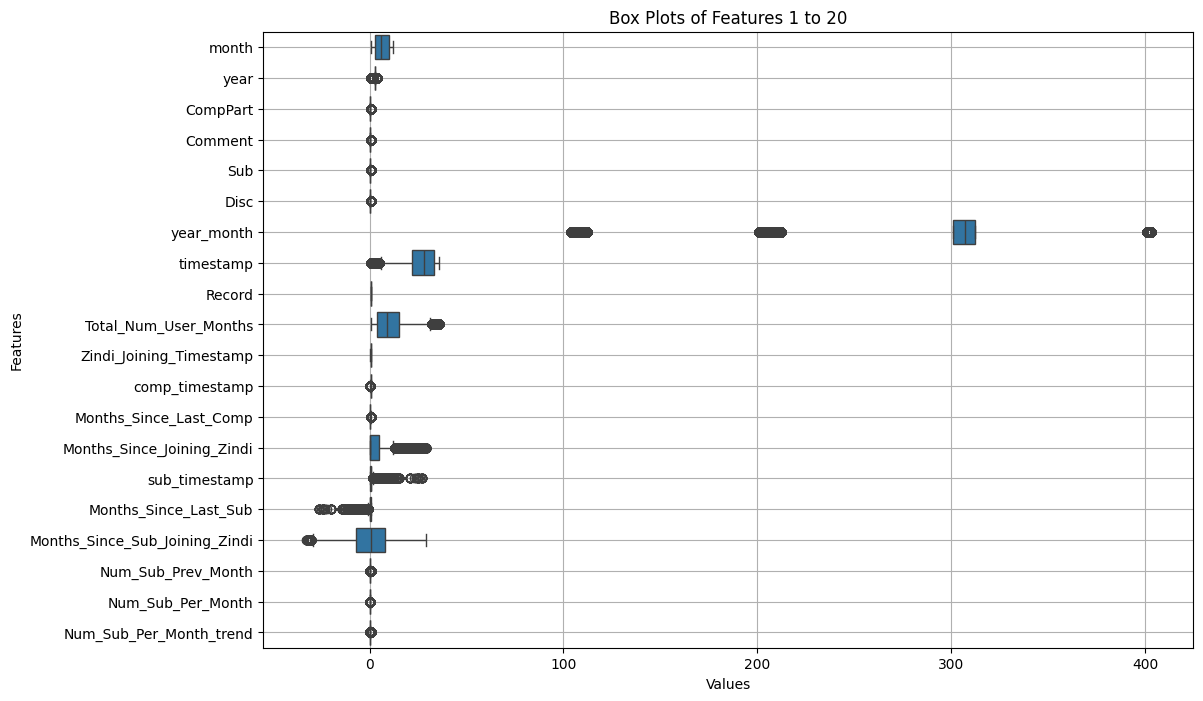

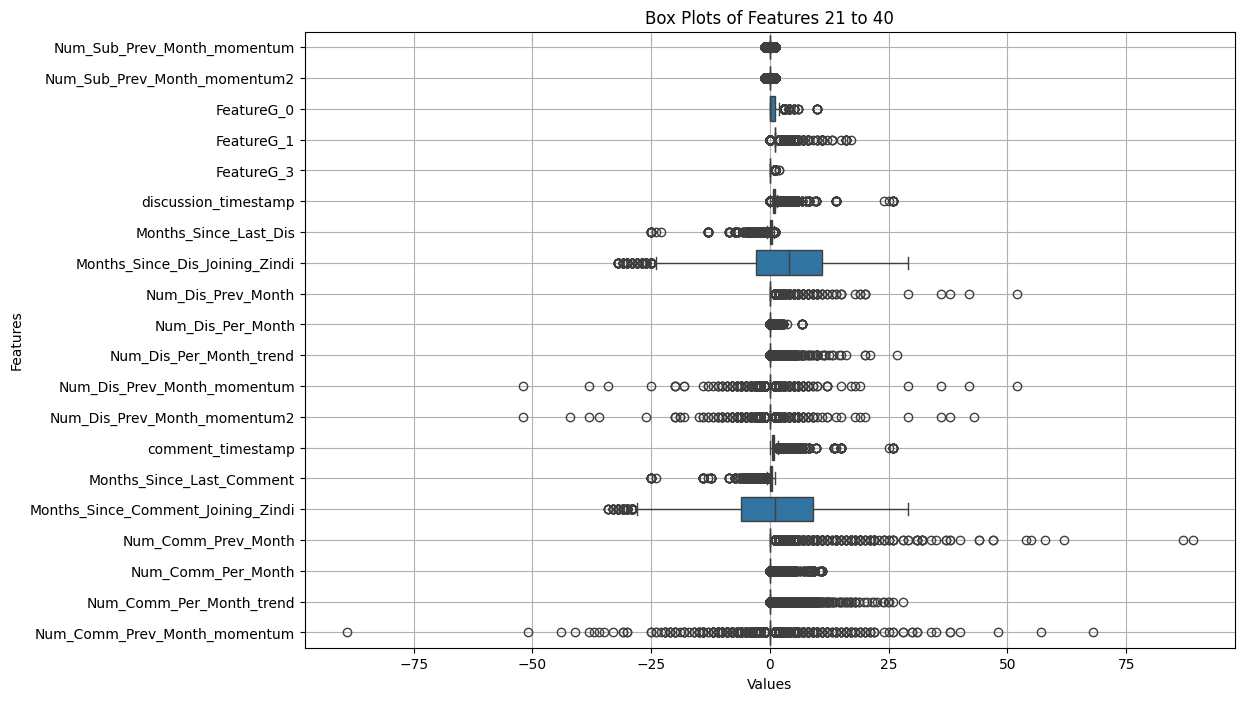

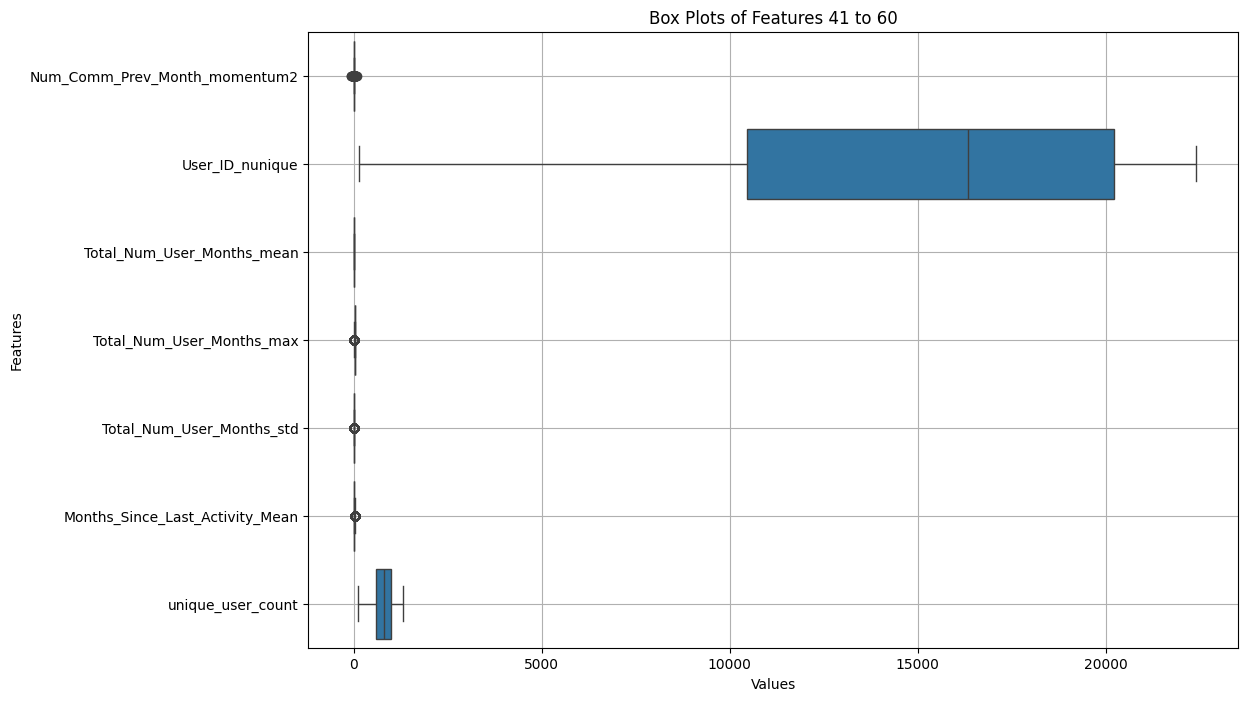

In [ ]:
num_cols = [col for col in overall.columns if overall[col].dtype in ['float64', 'int64'] and col != 'Target']

# Number of features per plot
features_per_plot = 20

# Number of plots needed
num_plots = len(num_cols) // features_per_plot + (1 if len(num_cols) % features_per_plot > 0 else 0)

# Loop through the number of plots
for i in range(num_plots):
    # Subset of features for the current plot
    subset_features = num_cols[i*features_per_plot : (i+1)*features_per_plot]

    # Melt the data for the current subset of features
    melted_data = overall[subset_features].melt(var_name='Features', value_name='Values')

    # Create a figure for the current subset
    plt.figure(figsize=(12, 8))  # Adjust figure size to your preference
    sns.boxplot(x='Values', y='Features', data=melted_data)
    plt.title(f'Box Plots of Features {i*features_per_plot + 1} to {(i+1)*features_per_plot}')
    plt.grid(True)  # Optional for better readability
    plt.show()

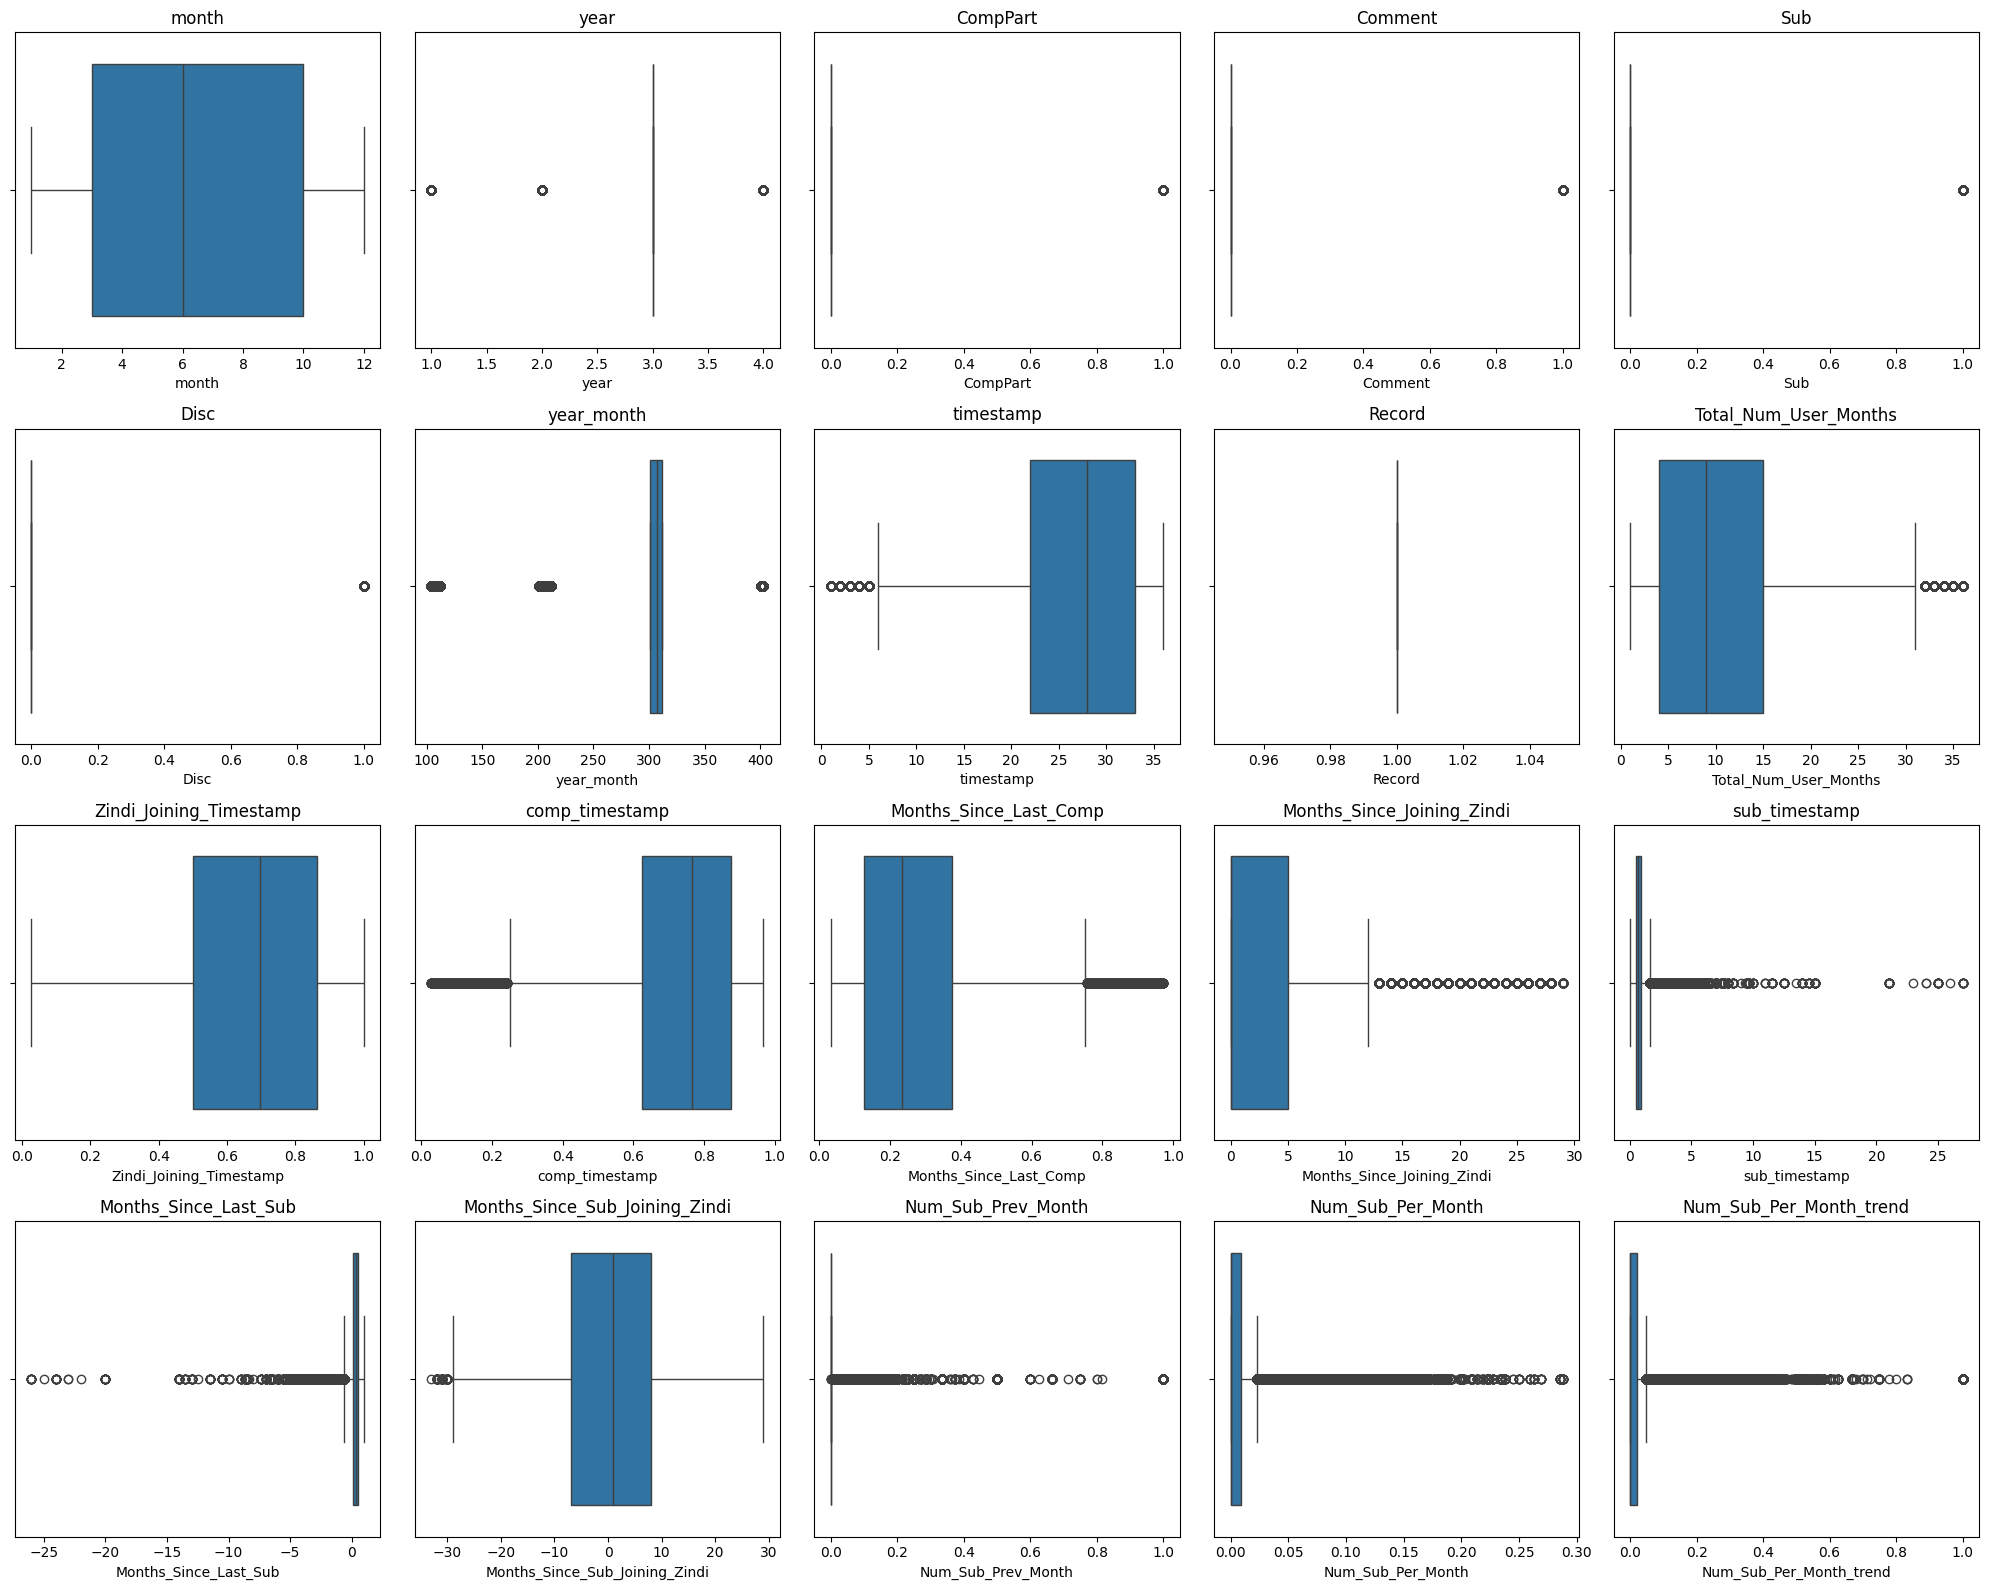

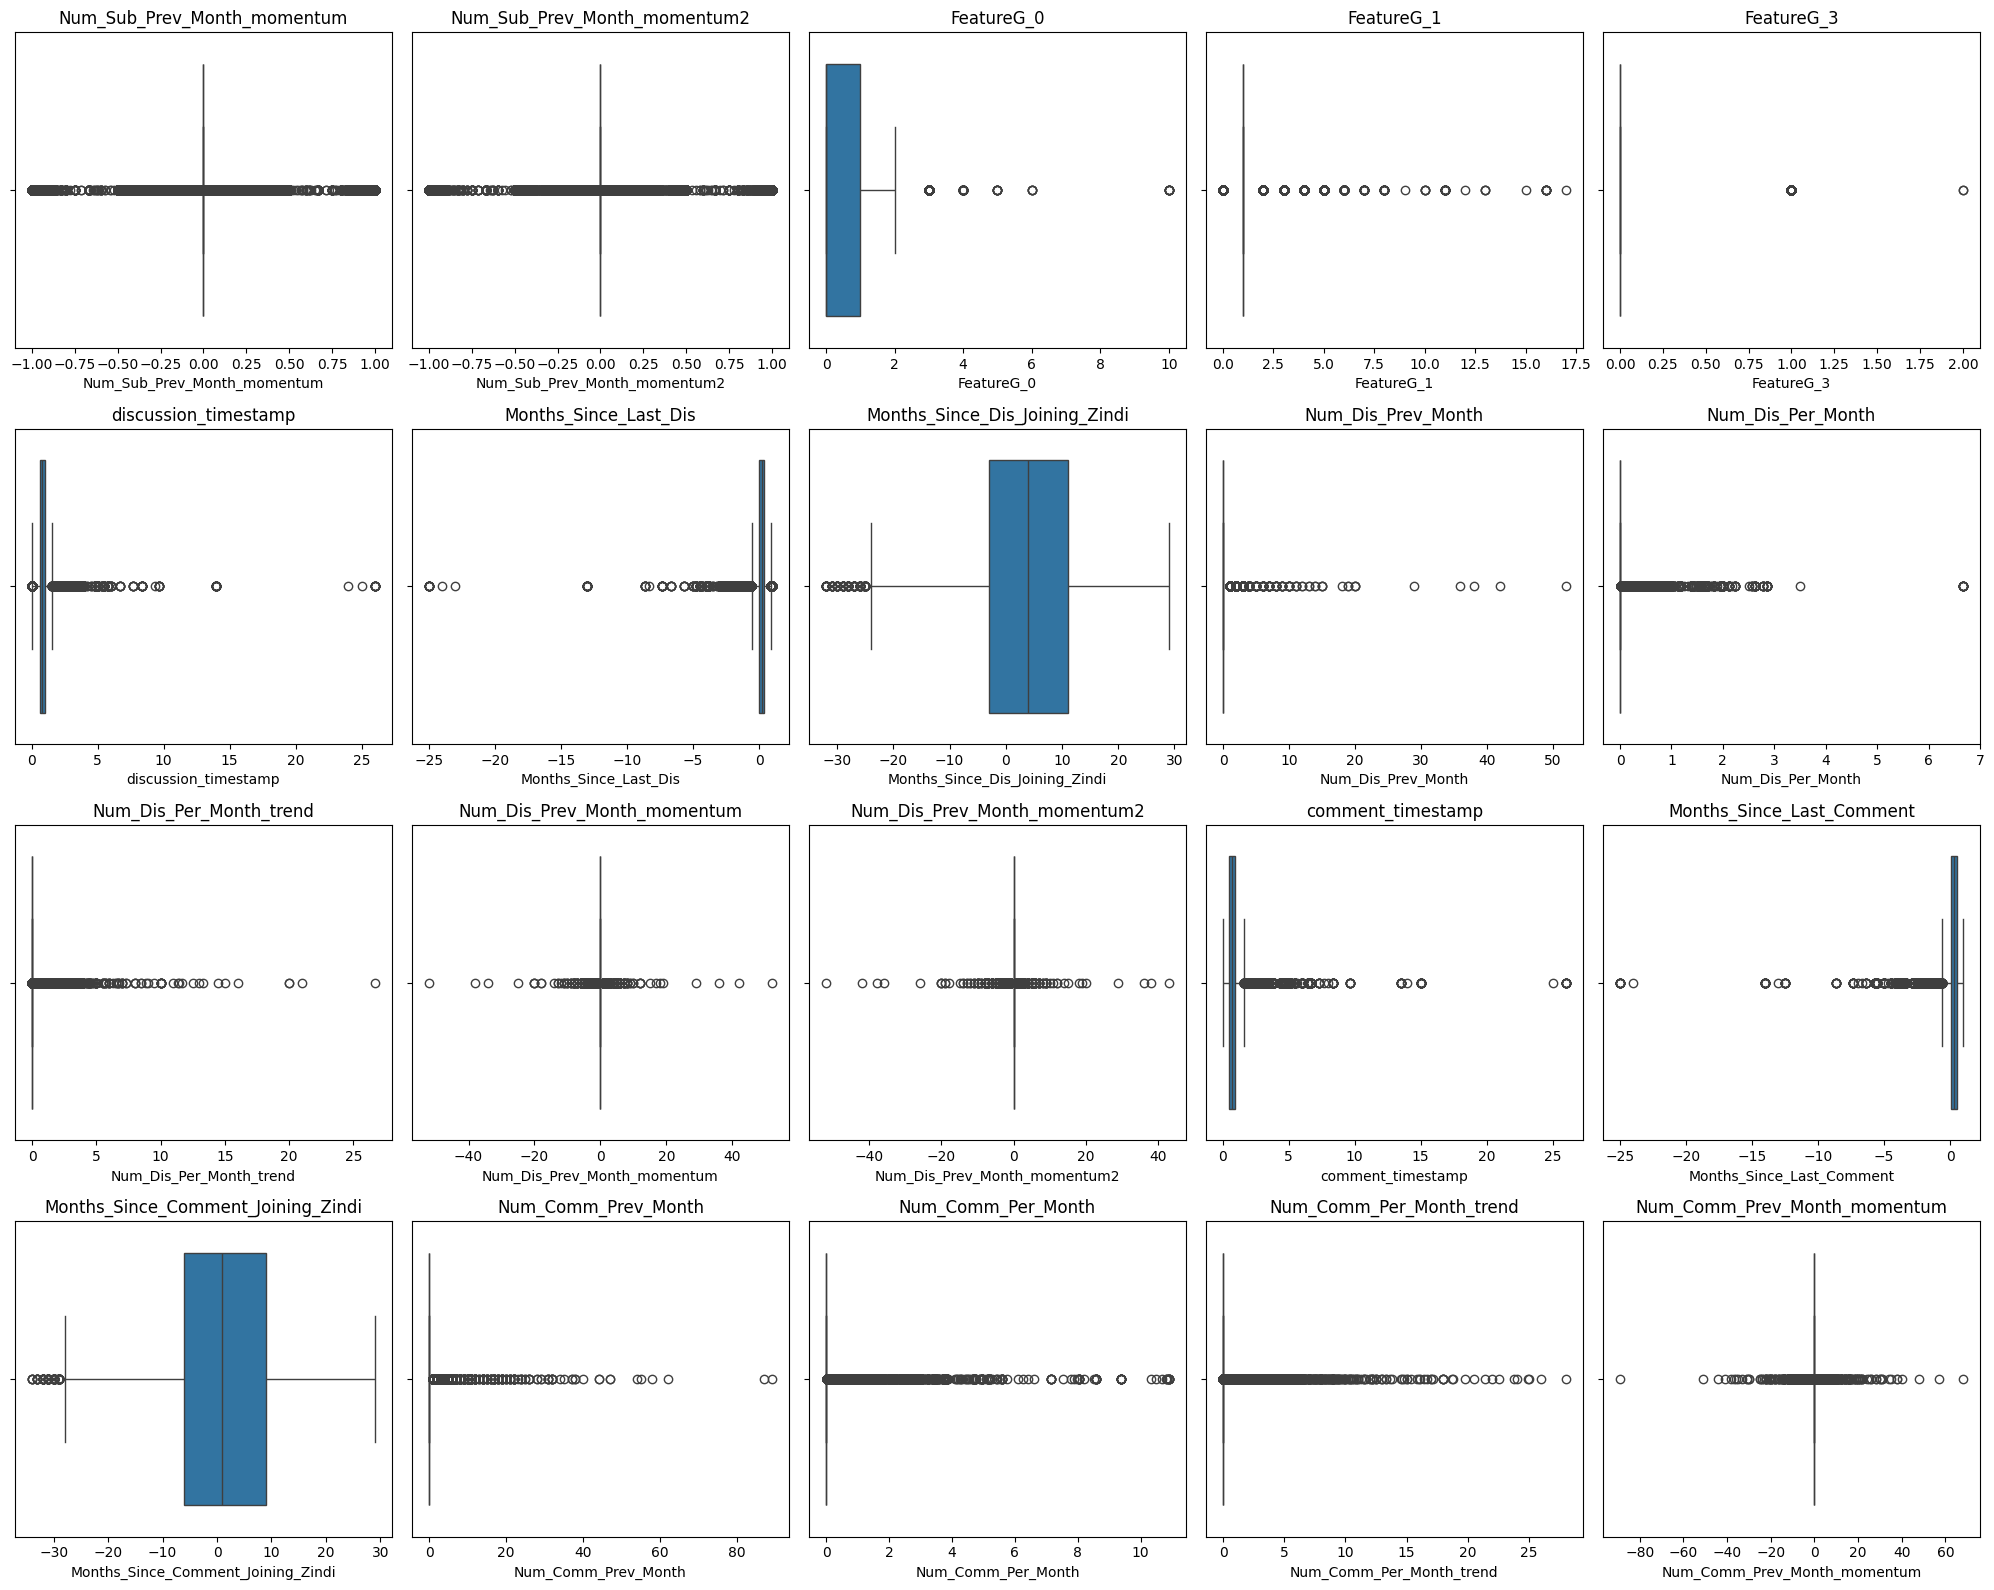

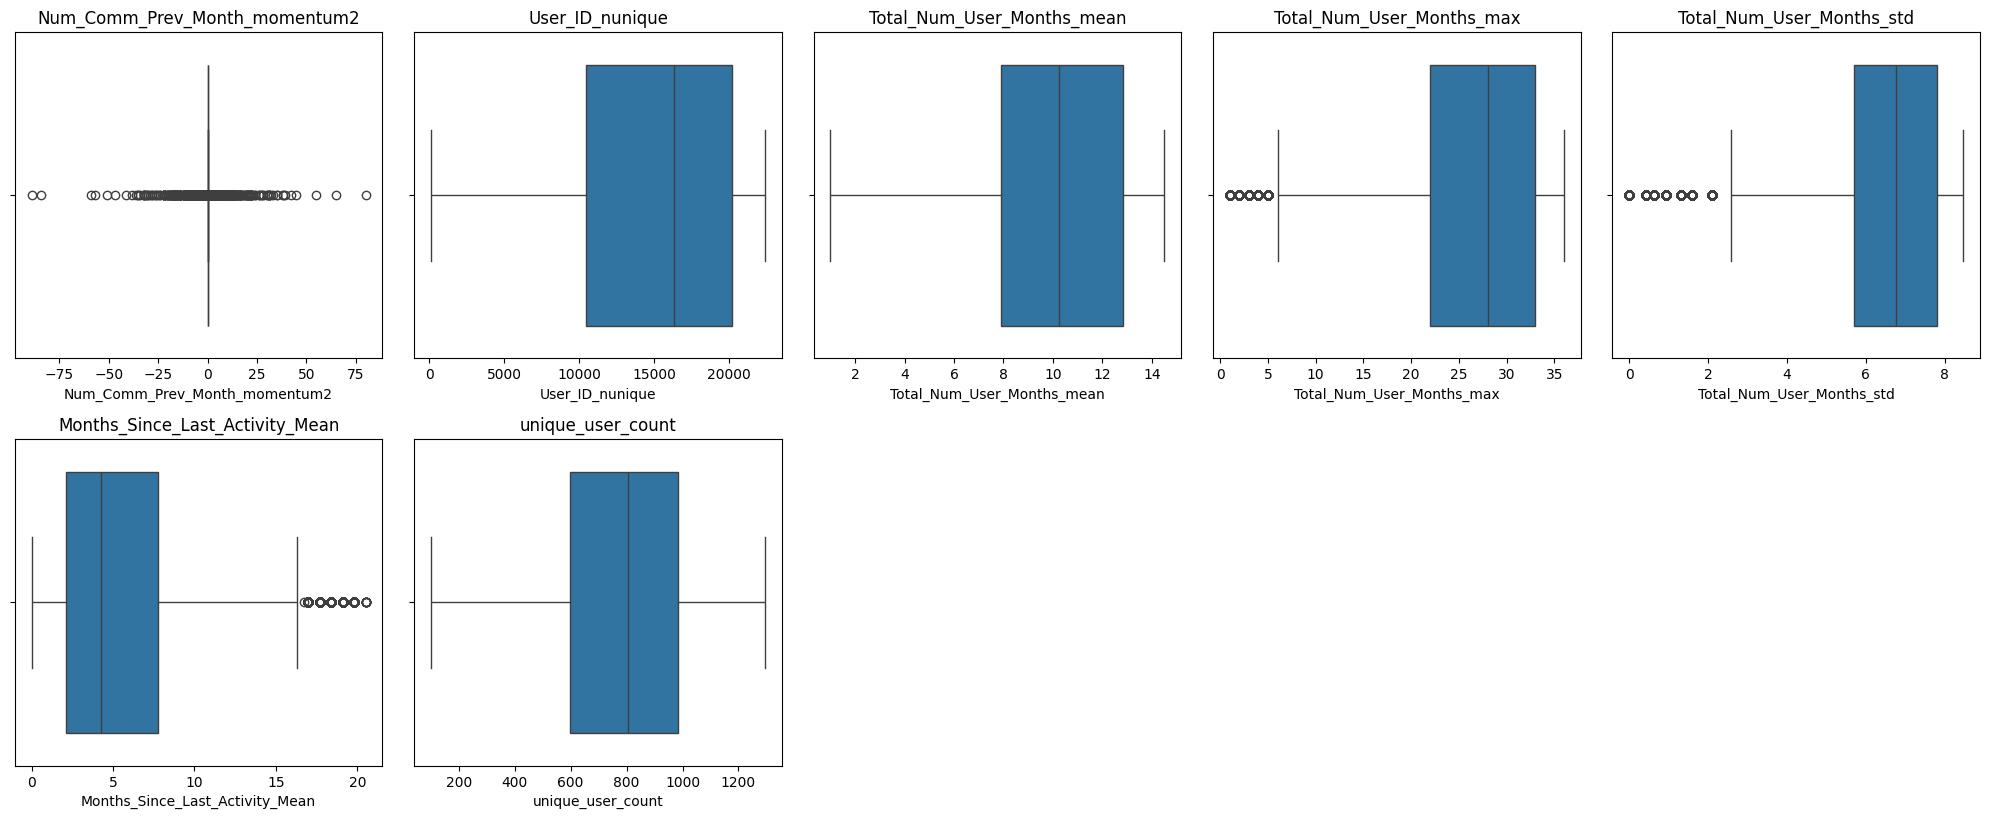

In [ ]:
num_cols = [col for col in overall.columns if overall[col].dtype in ['float64', 'int64'] and col != 'Target']

cols_per_subplot = 5

rows_per_figure = 4

features_per_figure = cols_per_subplot * rows_per_figure

total_figures = (len(num_cols) + features_per_figure - 1) // features_per_figure

for i in range(total_figures):
    plt.figure(figsize=(20, 16))
    start_index = i * features_per_figure
    end_index = start_index + features_per_figure
    for j, col in enumerate(num_cols[start_index:end_index], start=1):
        if j <= features_per_figure:
            plt.subplot(rows_per_figure, cols_per_subplot, j)
            sns.boxplot(x=overall[col])
            plt.title(col)
    plt.tight_layout()
    plt.show()

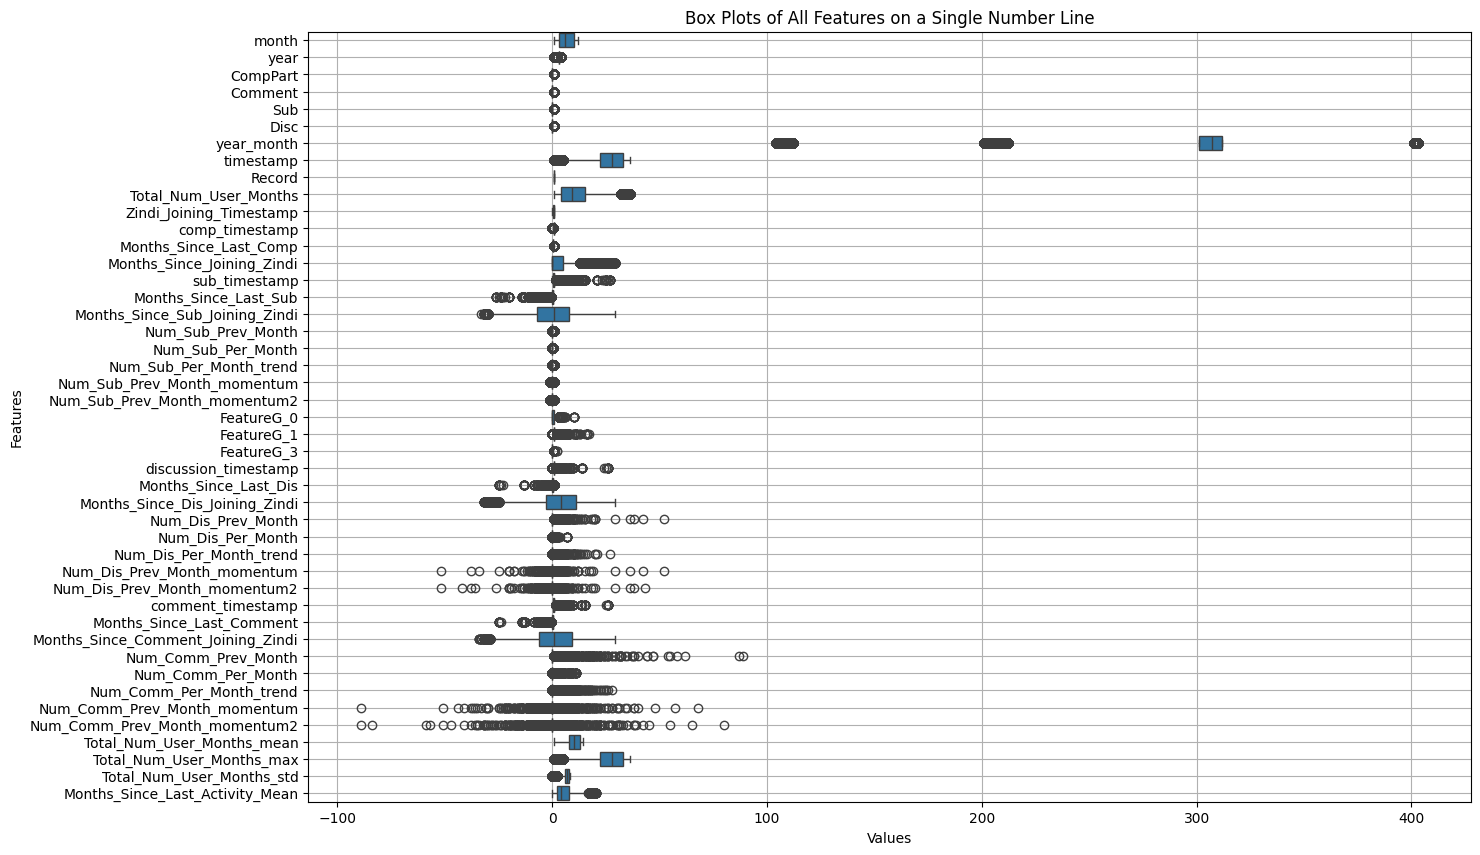

In [ ]:
num_cols = [col for col in overall.columns if overall[col].dtype in ['float64', 'int64'] and col != 'Target' and col != 'User_ID_nunique' and col != 'unique_user_count']

# Prepare the data in a long format for seaborn
melted_data = overall[num_cols].melt(var_name='Features', value_name='Values')

# Create a single horizontal box plot
plt.figure(figsize=(15, 10))  # Adjust the figure size as necessary
sns.boxplot(x='Values', y='Features', data=melted_data)
plt.title('Box Plots of All Features on a Single Number Line')
plt.grid(True)  # Optional: Adds a grid for better readability
plt.show()

<Axes: xlabel='Target', ylabel='Months_Since_Last_Activity_Mean'>

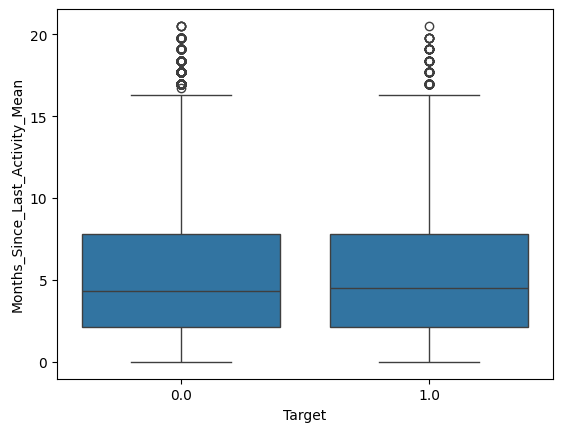

In [ ]:
sns.boxplot(x = 'Target', y = 'Months_Since_Last_Activity_Mean',  data = overall)

In [ ]:
def catplot_distribution(col):

    ax = overall[col].value_counts().sort_values().plot(kind = 'barh', figsize=(15, 15))
    plt.title(col + ' Distribution', fontdict={'size': 15})

    for p in ax.patches:

        percentage ='{:,.2f}%'.format((p.get_width()/overall.shape[0])*100)
        width, height =p.get_width(),p.get_height()
        x=p.get_x()+width+0.02
        y=p.get_y()+height/2
        ax.annotate(percentage,(x,y))


    plt.show()

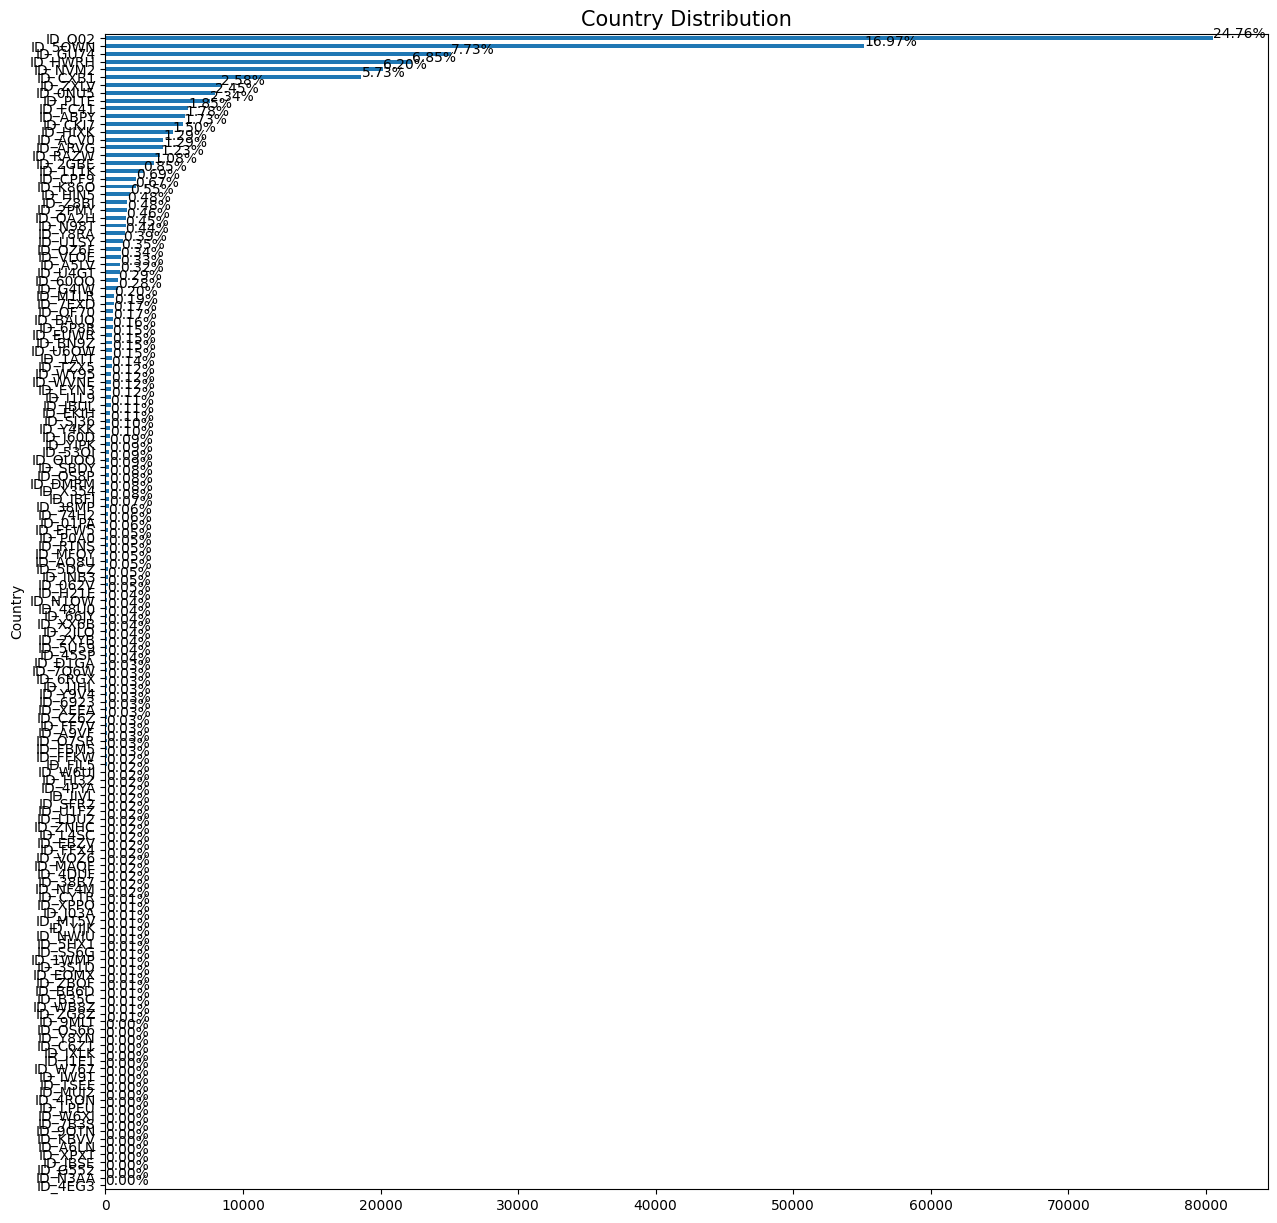

In [ ]:
catplot_distribution('Country')